In [32]:
import numpy as np 
import time
import cv2


def conv2dmatrix(I, H):
    start_time = time.time()
    convolved= np.dot(H, I)
    end_time = time.time()
    
    timer = end_time - start_time
    
    return convolved, timer

start_time = time.time()
# Input image 
#image= np.array([[1, 2, 3], [4, 5, 6], [7, 8 ,9]])
image = cv2.imread(r'C:\Users\prave\Downloads\HW 1\pop.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# width = int(image.shape[1] / 30)
# height = int(image.shape[0] / 30)
# dim = (width, height)
# image = cv2.resize(image,dim)

image_rows, image_columns = image.shape

# vectorize the image 
I = image.flatten().T

# kernel input 
kernel = np.array ([[1, 0 , -1], [1, 0, -1], [1, 0, -1]])
kernel_rows, kernel_columns = kernel.shape

output_rows, output_columns = (image_rows+kernel_rows-1, image_columns+kernel_columns-1)

kernel_padded= np.pad(kernel, ((output_rows-kernel_rows,0),(0, output_columns-kernel_columns)))

import scipy
toeplitz_list=[]
for i in range(kernel_padded.shape[0]-1, -1, -1):
    c=kernel_padded[i,:]
    r=np.r_[c[0],np.zeros(image_columns-1)]
    
    toeplitz_m=scipy.linalg.toeplitz(c,r)
    toeplitz_list.append(toeplitz_m)
c = range(1, kernel_padded.shape[0]+1)
r=np.r_[c[0],np.zeros(image_rows-1,dtype=int)]

doubly_indices=scipy.linalg.toeplitz(c,r)
h = toeplitz_m.shape[0]*doubly_indices.shape[0]
w = toeplitz_m.shape[1]*doubly_indices.shape[1]

doubly_blocked_shape=[h,w]
doubly_blocked=np.zeros(doubly_blocked_shape)

b_h, b_w = toeplitz_m.shape
for i in range(doubly_indices.shape[0]):
    for j in range(doubly_indices.shape[1]):
        start_i = i*b_h
        start_j = j*b_w
        end_i = start_i+b_h
        end_j = start_j+b_w
        doubly_blocked[start_i:end_i, start_j:end_j]= toeplitz_list[doubly_indices[i,j]-1]
      
H= (doubly_blocked.astype(int))

output, timet = conv2dmatrix(I, H )

output=output.reshape(output_rows, output_columns)
print(f"{timet:.15f}")
# print('Convolve image is\n', output)
cv2.imwrite("Edge.jpg",output.astype(np.uint8))
cv2.waitKey(0)


0.118610858917236


-1

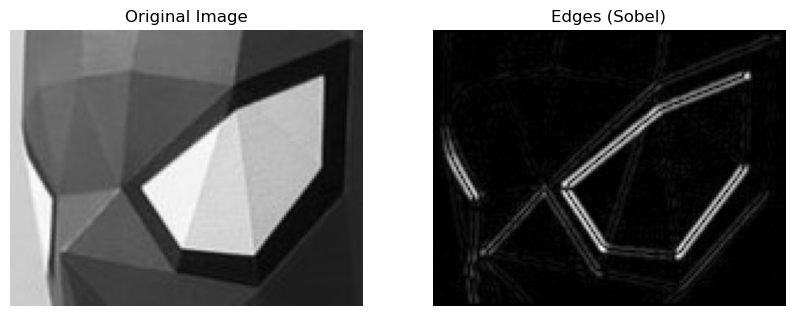

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Apply Sobel filter
edges = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)  # Sobel filter for both horizontal and vertical edges

# Convert negative values to positive
edges = np.abs(edges)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Edges (Sobel)'), plt.axis('off')
plt.show()


In [39]:
 output1 = output[:119, :152]
np.sum(edges- output1)


1396069.0

In [40]:
np.sum(edges)

1425904.0